In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Prateek KK
20BEC0102

# Task 1

In [125]:
data=pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [126]:
data.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [127]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

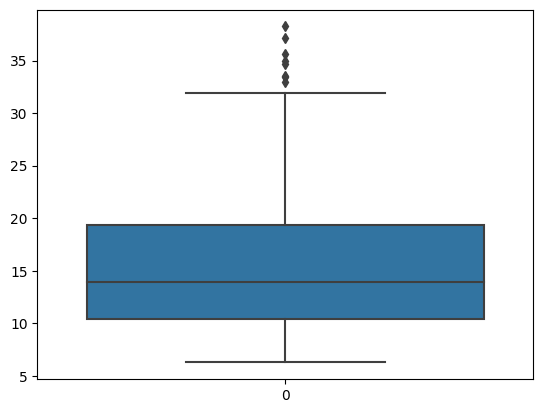

In [129]:
sns.boxplot(data['Na_to_K'])

In [130]:
q1 = data.Na_to_K.quantile(.25)
q3 = data.Na_to_K.quantile(.75)
print(f'q1: {q1:0,.2f} and q2: {q3:0,.2f}')

q1: 10.45 and q2: 19.38


In [131]:
IQR = q3 - q1
IQR

8.9345

In [132]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
print(upper_limit)

32.78175


In [133]:
data['Na_to_K'] =np.where(data['Na_to_K']>upper_limit,30,data['Na_to_K'])

<Axes: >

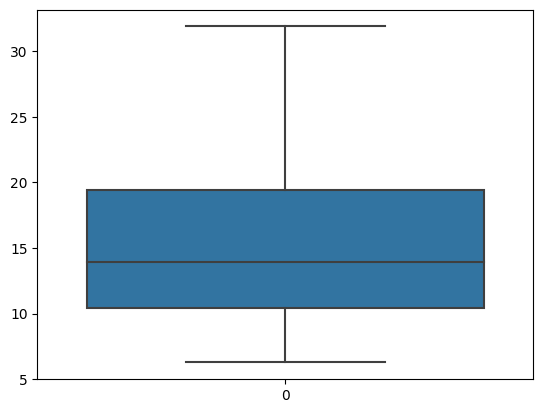

In [134]:
sns.boxplot(data['Na_to_K'])

In [240]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [241]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [242]:
x_train.shape

(160, 5)

In [243]:
x_test.shape

(40, 5)

In [244]:
y_train.shape

(160,)

In [245]:
y_test.shape

(40,)

In [246]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [247]:
x_train[:,1]=le.fit_transform(x_train[:,1])
x_test[:,1]=le.transform(x_test[:,1])

In [248]:
x_train[:,2]=le.fit_transform(x_train[:,2])
x_test[:,2]=le.transform(x_test[:,2])

In [249]:
x_train[:,3]=le.fit_transform(x_train[:,3])
x_test[:,3]=le.transform(x_test[:,3])

In [250]:
x_train=np.asarray(x_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)

In [251]:
x_test

array([[60.   ,  1.   ,  2.   ,  1.   , 10.091],
       [73.   ,  0.   ,  2.   ,  0.   , 19.221],
       [53.   ,  1.   ,  2.   ,  0.   , 14.133],
       [28.   ,  0.   ,  1.   ,  0.   , 13.127],
       [18.   ,  0.   ,  0.   ,  0.   , 30.   ],
       [23.   ,  1.   ,  2.   ,  1.   , 14.02 ],
       [36.   ,  1.   ,  1.   ,  1.   , 11.424],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043],
       [45.   ,  1.   ,  1.   ,  0.   , 17.951],
       [51.   ,  0.   ,  1.   ,  1.   , 23.003],
       [45.   ,  1.   ,  1.   ,  1.   , 10.017],
       [23.   ,  1.   ,  1.   ,  0.   ,  7.298],
       [34.   ,  0.   ,  0.   ,  1.   , 19.199],
       [50.   ,  0.   ,  2.   ,  1.   , 17.211],
       [50.   ,  1.   ,  0.   ,  0.   ,  7.49 ],
       [32.   ,  0.   ,  0.   ,  1.   , 10.292],
       [34.   ,  0.   ,  1.   ,  1.   , 12.923],
       [46.   ,  1.   ,  2.   ,  1.   ,  7.285],
       [55.   ,  0.   ,  0.   ,  0.   , 10.977],
       [34.   ,  1.   ,  0.   ,  0.   , 18.703],
       [67.   ,  1. 

In [252]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [253]:
y_test

array([4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, 1, 4, 4, 2, 0, 4, 4,
       4, 0, 2, 4, 4, 0, 3, 4, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [255]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [256]:
y_test

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1.

# Task 2

In [216]:
from keras.models import Sequential
from keras.layers import Dense

In [218]:
model = Sequential()

model.add(Dense(64,input_dim=5, activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(16,activation='relu'))

model.add(Dense(5,activation='softmax'))

In [219]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [220]:
res=model.fit(x_train,y_train,epochs=100,batch_size=5,validation_data=(x_test,y_test))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 1.9717 - accuracy: 0.5188 - val_loss: 1.0952 - val_accuracy: 0.6000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0854 - accuracy: 0.5750 - val_loss: 0.9634 - val_accuracy: 0.7000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1309 - accuracy: 0.5562 - val_loss: 1.0487 - val_accuracy: 0.6750
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0443 - accuracy: 0.5562 - val_loss: 0.9876 - val_accuracy: 0.6500
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0381 - accuracy: 0.6000 - val_loss: 0.9042 - val_accuracy: 0.6750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0044 - accuracy: 0.5813 - val_loss: 1.0452 - val_accuracy: 0.6250
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9304 - accuracy: 0.6187 - val_loss: 0.9869 - val_accuracy: 0.6000
Epoch 8/100
3

# Task 3

In [223]:
model.predict([[60.,1.,2.,1.,10.091]])

1/1 [==============================] - 0s 91ms/step


array([[2.4157357e-04, 3.1385683e-09, 1.9841661e-08, 8.3421044e-05,
        9.9967504e-01]], dtype=float32)

In [235]:
y_class=int(np.argmax(model.predict([[60.,1.,2.,1.,10.091]])))

1/1 [==============================] - 0s 136ms/step


In [237]:
print(y_class)

4


In [257]:
out=le.inverse_transform([y_class])

In [260]:
print(f'Predicted Output: {out}')

Predicted Output: ['drugX']
